In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.style.use('fast')

#path of the datasets
os.chdir("../Statistical Learning Answers/..")
dataset_path = os.path.join(os.getcwd(),"DataSets")

### Boston Data
A data set containing housing values in 506 suburbs of Boston.

- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per $10,000.
- ptratio: pupil-teacher ratio by town.
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in $1000s.

In [2]:
boston_df = pd.read_csv(f'{dataset_path}/Boston.csv', index_col=0)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### a) How many rows and columns are in this dataset?

In [3]:
boston_df.shape

(506, 13)

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


### b) Make some pairwise scatterplots of the predictors (columns) in this data set

[]

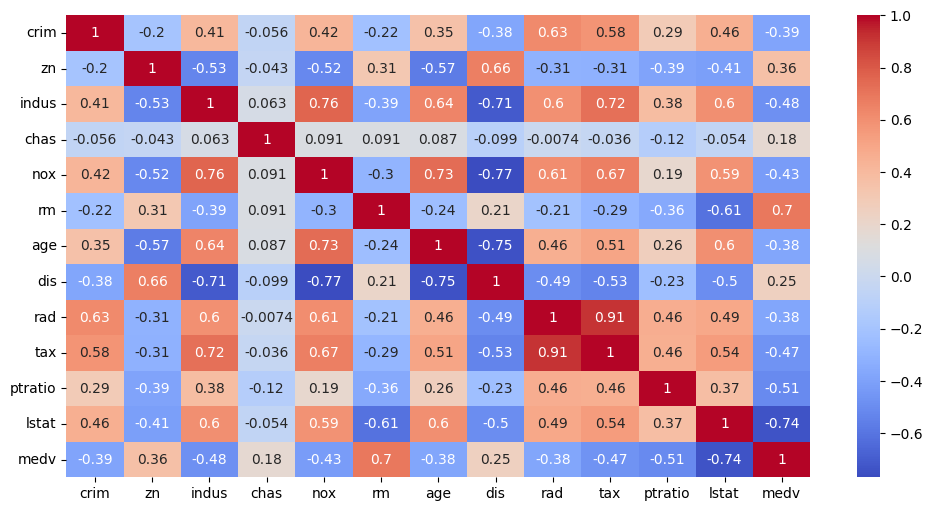

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm')
plt.plot()

[]

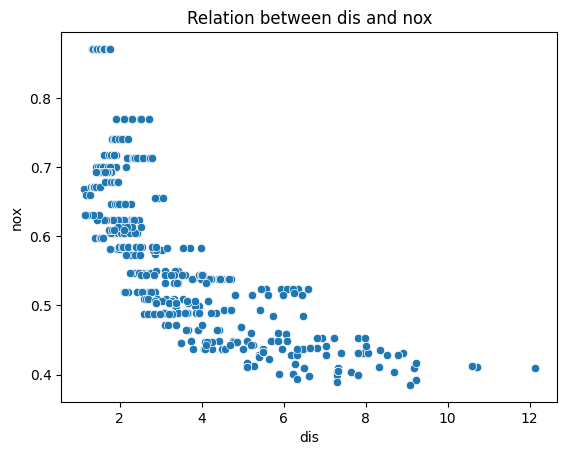

In [6]:
# Relation between dis and nox
sns.scatterplot(boston_df, x='dis', y='nox')
plt.title('Relation between dis and nox')
plt.plot()

As we can see, a negative correlation exists between the distance to the employment centres and the concentration of nitrogen oxides. 

### d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

[]

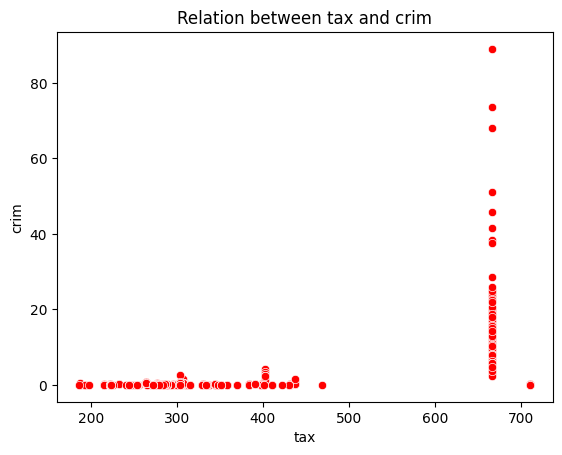

In [7]:
# Relation between tax and criminal rate
sns.scatterplot(boston_df, x='tax', y='crim', color='red')
plt.title('Relation between tax and crim')
plt.plot()

As we can see, taxation and criminal rate don't have a clear relation.

The strongest correlation with criminal rate is rad column, that is 0.63.

[]

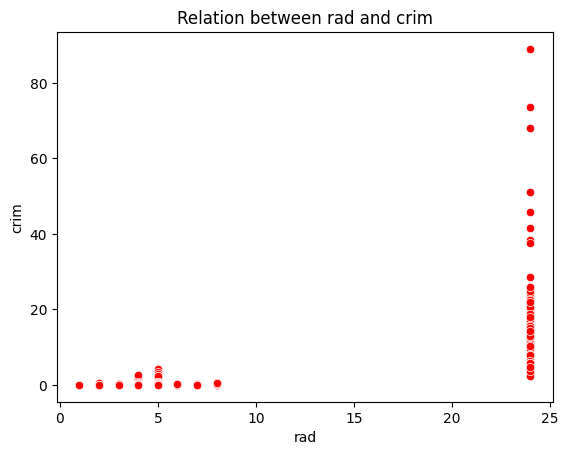

In [8]:
# Relation between rad and criminal rate
sns.scatterplot(boston_df, x='rad', y='crim', color='red')
plt.title('Relation between rad and crim')
plt.plot()

### e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? 

[]

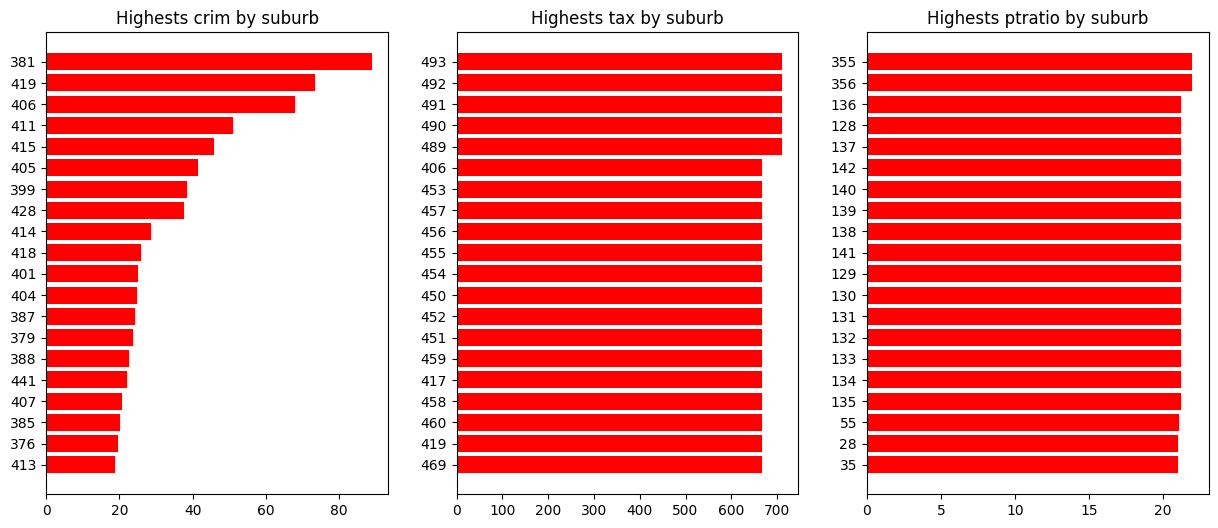

In [9]:
# Showing the highests criminal rates, tax rates and pupil-teacher ratios by suburb


interest_columns = ['crim', 'tax', 'ptratio']

fig, ax = plt.subplots(nrows=1, ncols=len(interest_columns), figsize=(15,6))


for index, column in enumerate(interest_columns):
    boston_df_crim_20 = boston_df.sort_values(column, ascending=False).copy().iloc[:20]
    ax[index].barh(width=boston_df_crim_20[column], y=boston_df_crim_20.index.astype('str'), data=boston_df_crim_20, color='red')
    ax[index].invert_yaxis()
    ax[index].set_title(f'Highests {column} by suburb')

plt.plot()

### f) How many of the suburbs in this data set bound the Charles river?

[]

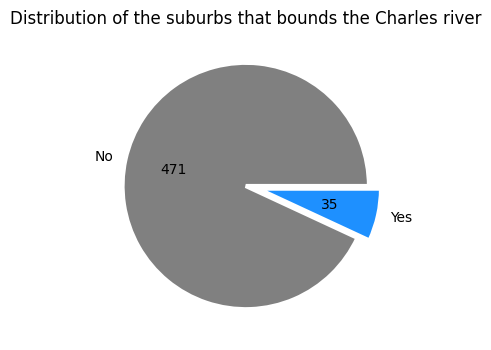

In [10]:
plt.figure(figsize=(32, 4))

colors = ['grey', 'dodgerblue']
chas_count = boston_df.chas.value_counts()
chas_count.index = np.where( chas_count.index == 1, 'Yes', 'No')

plt.pie(
    x= chas_count
    , labels= chas_count.index
    , autopct= lambda p: '{:.0f}'.format(p * np.sum(chas_count) / 100)
    , colors=colors
    , explode= (0, 0.1)
    , wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}

)
plt.title('Distribution of the suburbs that bounds the Charles river')
plt.plot()

### g) What is the median pupil-teacher ratio among the towns in this data set?

[]

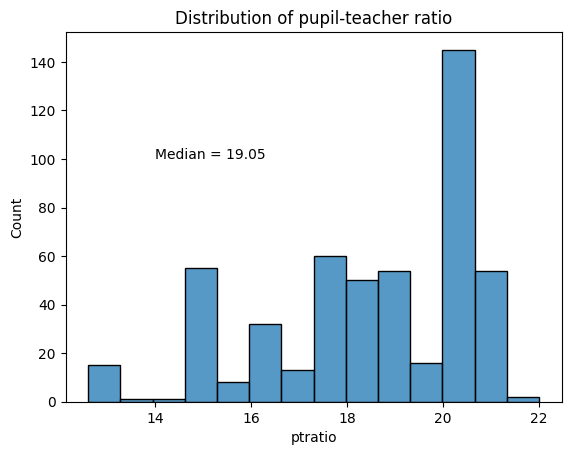

In [11]:
ptratio_median = np.median(boston_df.ptratio)
comment = f'Median = {ptratio_median}'

sns.histplot(boston_df['ptratio'])
plt.title('Distribution of pupil-teacher ratio')
plt.annotate(comment, xy=(14, 6), xytext=(14, 100))
plt.plot()

### h)  Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors?

[]

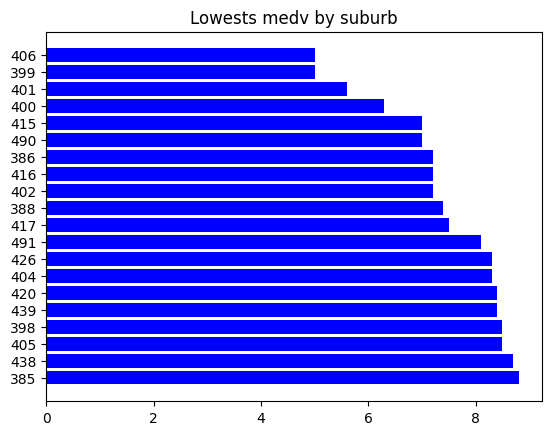

In [12]:
# Distribution of MEDV
boston_df_age_20 = boston_df.sort_values('medv', ascending=False).copy()[-20:]
plt.barh(width=boston_df_age_20['medv'], y=boston_df_age_20.index.astype('str'), data=boston_df_age_20, color='blue')
plt.title(f'Lowests medv by suburb')

plt.plot()

the suburb with index 406 has the lowest proportion owner-occupied home, comparing it with the others suburbs, we have:

In [13]:
boston_df_describe = boston_df.describe()
boston_df_describe_with_406 = pd.concat([boston_df_describe, boston_df[boston_df.index == 406]]).copy()

boston_df_describe_with_406

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000
406,67.920800,0.000000,18.100000,0.000000,0.693000,5.683000,100.000000,1.425400,24.000000,666.000000,20.200000,22.980000,5.000000


- suburb 406 has a high crim rate compared to the mean of the dataset and the 75% percentile
- relatively less distance of employment centres (dis)
- no residential land zoned for lots over 25000 sq.ft. (zn)
- high proportion of owner-occupied units built prior to 1940 (age)

### i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?

[]

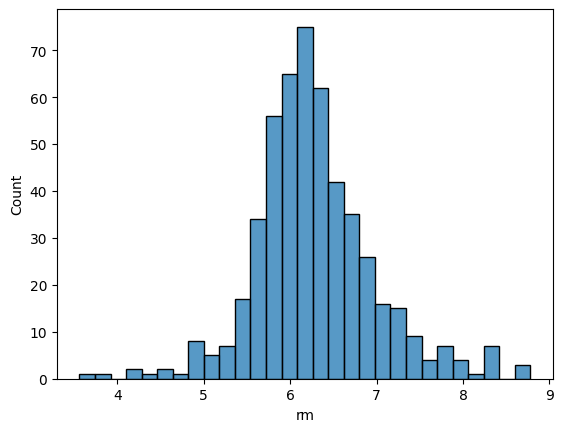

In [14]:
# Distribution of the average rooms per dwelling
sns.histplot(boston_df.rm)
plt.plot()

In [15]:
df_more_7_rooms = boston_df.query('rm > 7').copy()
len(df_more_7_rooms)

64

In [16]:
df_more_8_rooms = boston_df.query('rm > 8').copy()
len(df_more_8_rooms)

13

In [17]:
df_more_8_rooms.describe().loc['mean']

crim         0.718795
zn          13.615385
indus        7.078462
chas         0.153846
nox          0.539238
rm           8.348538
age         71.538462
dis          3.430192
rad          7.461538
tax        325.076923
ptratio     16.361538
lstat        4.310000
medv        44.200000
Name: mean, dtype: float64

In [18]:
boston_df_describe.loc['mean']

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
lstat       12.653063
medv        22.532806
Name: mean, dtype: float64

The suburbs wih dwellings with more than 8 rooms have on average have:
- Less crime rates (crim)
- Less percentage of lower status of the population (lstat)
- Higher median value of owner-occupied homes